# **Exploring groups of data**

- We can explore the characteristics of subsets of data further with the help of the dot-groupby function, which groups data by a given category, allowing the user to chain an aggregating function like dot-mean or dot-count to describe the data within each group. 
- For example, we can group the books data by genre by passing the genre column name to the groupby function. 
- Then, we chain an aggregating function, in this case, dot-mean, to find the mean value of the numerical columns for each genre. 
- The results show that children's books have a higher average rating than other genres.

- `.groupby()` groups data by category
- Aggregating function indicates how to summarize grouped data

In [ ]:
books.groupby("genre").mean()

In [ ]:
|       genre |   rating |        year |
|-------------|----------|-------------|
|   Childrens | 4.780000 | 2015.075000 |
|     Fiction | 4.570229 | 2013.022901 |
| Non Fiction | 4.598324 | 2013.513966 |

# **Aggregating functions**

- Sum: `.sum()`
- Count: `.count()`
- Minimum: `.min()`
- Maximum: `.max()`
- Variance: `.var()`
- Standard deviation: `.std()`

# **Aggregating ungrouped data**

- `.agg()` applies aggregating functions across a DataFrame

In [ ]:
books.agg(["mean", "std"])

In [ ]:
          rating	       year
mean	4.608571	2013.508571
std  	0.226941	    3.28471

# **Specifying aggregations for columns**





-  we can even use a dictionary to specify which aggregation functions to apply to which columns. 
-  The keys in the dictionary are the columns to apply the aggregation, and each value is a list of the specific aggregating functions to apply to that column.

In [ ]:
books.agg({"rating": ["mean", "std"], "year": ["median"]})

In [ ]:
          rating   year        
mean	4.608571   NaN
std	    0.226941   NaN
median	NaN	       2013.0

# **Named summary columns**

- By combining dot-agg and dot-groupby, we can apply these new exploration skills to grouped data. 
- Maybe we'd like to show the mean and standard deviation of rating for each book genre along with the median year. 
- We can create named columns with our desired aggregations by using the dot-agg function and creating named tuples inside it. 
- Each named tuple should include a column name followed by the aggregating function to apply to that column. 
- The name of the tuple becomes the name of the resulting column. 
- Now, we can get two summary values of interest about ratings and our year data looks cleaner! We can see that the Fiction genre has the lowest average rating as well as the largest variation in ratings.

In [ ]:
books.groupby("genre").agg(
    mean_rating=("rating", "mean"),
    std_rating=("rating", "std"),
    median_year=("year", "median")
)

In [ ]:
| genre           | mean_rating  | std_rating  | median_year  |
|-----------------|--------------|-------------|--------------|
| Childrens       | 4.780000     | 0.122370    | 2015.0       |
| Fiction         | 4.570229     | 0.281123    | 2013.0       |
| Non Fiction     | 4.598324     | 0.179411    | 2013.0       |

# **Visualizing categorical summaries**

In [ ]:
sns.barplot(data=books, x="genre", y="rating")
plt.show()

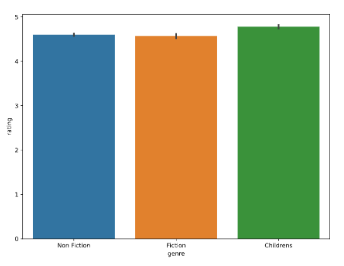